In [1]:
!pip install -qq -U mlxtend

In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth
from mlxtend.frequent_patterns import association_rules
import nltk
from nltk.tokenize import word_tokenize
import re
from nltk.stem import PorterStemmer
from tqdm.auto import tqdm
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
STOPWORDS = set(nltk.corpus.stopwords.words("english") + ["says", "us", "said" ,"new", "optout", "stop", "ask", "stay", "talk","communityrepli", "free","activ", "agenc"])
PORTER_STEMMER = PorterStemmer()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# reuters_4000 = pd.read_csv("/content/drive/MyDrive/Atharva_Scrape/Reuters_Health-5000.csv")
reuters_4000 = pd.read_csv('/content/drive/MyDrive/Project 2/Colab/Atharva_Scrape/Reuters_Health-5000.csv')

In [6]:
len(reuters_4000)

5416

In [7]:
reuters_4000.iloc[0]['tweet']


"Walgreens Boots Alliance Inc kept its 2022 earnings forecast unchanged even as it beat estimates for second-quarter results, sending the drugstore chain's shares down 7% on fears of slower-than-expected growth for the rest of the year. https://t.co/ehuvVMCxWG"

In [8]:
def clean_tweets(x):
    # Lowercase
    sentence = x.lower()
    
    # Remove all non-alphabets (punctuation, numbers, new-line characters and extra-spaces)
    sentence = re.sub('http[s]?://\S+', '', sentence)
    sentence = re.sub(r'([^a-zA-Z ]+?)', '', sentence)
    #print(sentence)
    #sentence = sentence.replace('\n', '')
    # Remove URLs
    
    #print(sentence)
    # Remove double spacing
    #sentence = re.sub('\s+', ' ', sentence)
    tokenized_tweet = [word for word in word_tokenize(sentence) if word not in STOPWORDS]
    tokenized_tweet = [PORTER_STEMMER.stem(word) for word in tokenized_tweet]
    return tokenized_tweet

In [9]:
tqdm.pandas()
reuters_4000["tokenized_tweet"] = reuters_4000["tweet"].progress_apply(lambda x : clean_tweets(x))

  0%|          | 0/5416 [00:00<?, ?it/s]

In [10]:
tokenized_tweets = reuters_4000["tokenized_tweet"].values.tolist()
te = TransactionEncoder()
te_ary = te.fit(tokenized_tweets).transform(tokenized_tweets)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [11]:
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

In [12]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [13]:
len(frequent_itemsets)

18358

In [14]:
print(frequent_itemsets)

        support                                           itemsets  length
0      0.026773                                           (accord)       1
1      0.010524                                           (across)       1
2      0.014771                                               (ad)       1
3      0.010155                                            (addit)       1
4      0.015694                                         (administ)       1
...         ...                                                ...     ...
18353  0.036004  (warrant, recent, peer, follow, yet, review, s...      13
18354  0.036004  (warrant, recent, peer, find, follow, yet, rev...      13
18355  0.036004  (warrant, recent, peer, find, follow, yet, rev...      13
18356  0.036004  (warrant, recent, peer, find, follow, yet, rev...      13
18357  0.036004  (warrant, recent, peer, find, follow, yet, rev...      14

[18358 rows x 3 columns]


In [16]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)

In [17]:
print (rules)

        antecedents                                        consequents  \
0          (accord)                                            (covid)   
1           (covid)                                           (accord)   
2           (covid)                                         (administ)   
3        (administ)                                            (covid)   
4        (administ)                                             (dose)   
...             ...                                                ...   
4758521    (includ)  (warrant, recent, peer, find, follow, yet, rev...   
4758522   (summari)  (warrant, recent, peer, find, follow, yet, rev...   
4758523  (research)  (warrant, recent, peer, find, follow, yet, rev...   
4758524     (covid)  (warrant, recent, peer, find, follow, yet, rev...   
4758525   (certifi)  (warrant, recent, peer, find, follow, yet, rev...   

         antecedent support  consequent support   support  confidence  \
0                  0.026773           

In [20]:
support=rules['support'].values
confidence=rules['confidence'].values

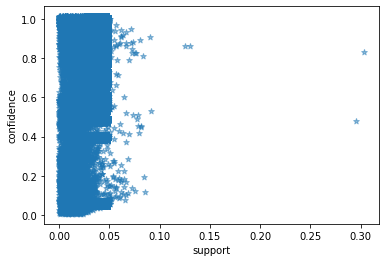

In [21]:
import random
import matplotlib.pyplot as plt
 
 
for i in range (len(support)):
   support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
   confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)
 
plt.scatter(support, confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

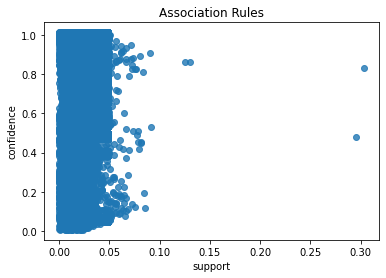

In [22]:
import seaborn as sns1
 
for i in range (len(support)):
    support[i] = support[i] 
    confidence[i] = confidence[i] 
     
plt.title('Association Rules')
plt.xlabel('support')
plt.ylabel('confidence')    
sns1.regplot(x=support, y=confidence, fit_reg=False)

In [25]:
import numpy as np

In [37]:
rules.to_csv('/content/drive/MyDrive/Project 2/Colab/Reuters_health_rules.csv')

In [38]:
for col in rules.columns:
    print(col)

antecedents
consequents
antecedent support
consequent support
support
confidence
lift
leverage
conviction


In [39]:
rules.iloc[0]['antecedents']

frozenset({'accord'})

In [45]:
len(rules)

4758526

In [42]:
def draw_graph(rules, rules_to_show):
  import networkx as nx  
  G1 = nx.DiGraph()
   
  color_map=[]
  N = 50
  colors = np.random.rand(N)    
  strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']   
   
   
  for i in range (rules_to_show):      
    G1.add_nodes_from(["R"+str(i)])
    
     
    for a in rules.iloc[i]['antecedents']:
                
        G1.add_nodes_from([a])
        
        G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
       
    for c in rules.iloc[i]['consequents']:
             
            G1.add_nodes_from([c])
            
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)
 
  for node in G1:
       found_a_string = False
       for item in strs: 
           if node==item:
                found_a_string = True
       if found_a_string:
            color_map.append('yellow')
       else:
            color_map.append('green')       
 
 
   
  edges = G1.edges()
  colors = [G1[u][v]['color'] for u,v in edges]
  weights = [G1[u][v]['weight'] for u,v in edges]
 
  pos = nx.spring_layout(G1, k=16, scale=1)
  nx.draw(G1, pos, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            
   
  for p in pos:  # raise text positions
           pos[p][1] += 0.07
  nx.draw_networkx_labels(G1, pos)
  plt.show()

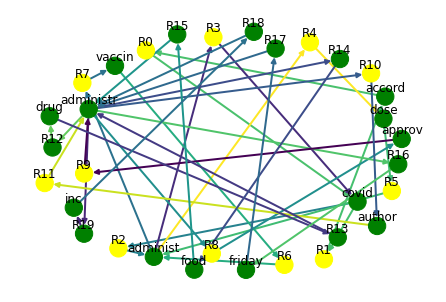

In [44]:
draw_graph(rules,20)  

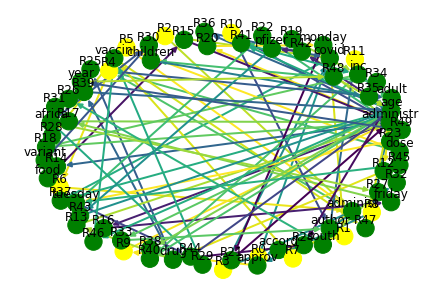

In [47]:
draw_graph(rules,50)  

In [55]:
print('end')

end


------------------------------------------------------------------------------------

In [1]:
!pip install -qq -U mlxtend

     |████████████████████████████████| 1.3 MB 5.1 MB/s 


In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth
from mlxtend.frequent_patterns import association_rules



In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
import numpy as np
import tqdm
import nltk
import re
from operator import itemgetter
import time
from pprint import pprint
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
reuters_4000 = pd.read_csv('/content/drive/MyDrive/Project 2/Colab/Atharva_Scrape/Reuters_Health-5000.csv')

In [5]:
def preprocess_text(sentence):
    # Lowercase
    sentence = sentence.lower()
    
    # Remove all non-alphabets (punctuation, numbers, new-line characters and extra-spaces)
    sentence = re.sub(r'[^a-zA-Z]+', ' ', sentence)
    sentence = sentence.replace('\n', '')
    # Remove URLs
    sentence = re.sub(r'https\S+', '', sentence)
    # Remove double spacing
    sentence = re.sub('\s+', ' ', sentence)
    
    # Tokenize & remove stop-words
    word_list = nltk.word_tokenize(sentence)    
    stopwords_list = nltk.corpus.stopwords.words('english')
    stopwords_list.extend(["says", "us", "said" ,"new", "optout", "stop", "ask", "stay", "talk","communityrepli", "free","activ", "agenc"])
    word_list = [word for word in word_list if word not in stopwords_list]
    
    # Remove very small words, length < 3, they don't contribute any useful information
    word_list = [word for word in word_list if len(word) > 3]
        
    # Stem & Lemmatize
    porter_stemmer = nltk.stem.PorterStemmer()
    lemmatizer = nltk.stem.WordNetLemmatizer()
    word_list = [porter_stemmer.stem(word) for word in word_list]
    word_list = [lemmatizer.lemmatize(word) for word in word_list]
    
    sentence = ' '.join(word_list)
    
    return sentence

In [6]:
# Pre-process the dataset
tqdm.tqdm.pandas()
reuters_4000['tokenized_tweet'] = reuters_4000['tweet'].progress_apply(lambda x:preprocess_text(str(x)))

100%|██████████| 5416/5416 [00:18<00:00, 285.84it/s]


In [7]:
tokenized_tweets = reuters_4000["tokenized_tweet"].values.tolist()
te = TransactionEncoder()
te_ary = te.fit(tokenized_tweets).transform(tokenized_tweets)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [ ]:
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

----------------------------------------------------------------------------------

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SMH2021/Datasets/ngo/WHO_Tweets.csv')
df=df.sample(n=100)

In [ ]:
df['tweet_cleaned']

4336     strong health workforc achiev healthforal cari...
20304    medsformalaria drtedro whoafro whosearo whowpr...
8823     whoafro miss covid press brief rapid diagnost ...
1432     test viral pregnant woman wait hepat commonli ...
221      leadership shown potu commend provid much need...
                               ...                        
30827    billion peopl lack safe water home put risk ch...
11425    know impact pandem beyond health need especi p...
23042    whoafro whosearo europ whoemro whowpro pahowho...
14310                 medium brief covid drtedro http ymdn
22632     live geneva dengu evelackritz askwho http izcyrd
Name: tweet_cleaned, Length: 100, dtype: object

In [ ]:
# df=df['tweet_cleaned']
with open('file.txt', 'w') as f:
    dfAsString = df.to_string(header=False, index=False)
    f.write(dfAsString)

In [ ]:
df.iloc[0]['tweet_cleaned']

'strong health workforc achiev healthforal caribbean countri boost capac nurs critic care improv avail qualiti care patient boost reach healthequ http cvssmuujfr worldhealthday http hmuhuockli'

In [ ]:
# text  = open('in.txt').read() #if from input file
 #if not from input file
# text
import csv
with open('out.csv','a') as f:
    for i in range(0,100):
      text = df.iloc[i]['tweet_cleaned']
      words = text.split()
      wr = csv.writer(f, dialect='excel')
      wr.writerow(words)
    # f.write(','.join(text.split(' ')))

In [ ]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=d01867b55f7fca4c2de37e37a83d17355485a76f541974e0bc265a6b2bc4f63e
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori


In [ ]:
col_names = ["col1", "col2", "col3", "col4", "col5", "col6", "col7", "col8", "col9", "col10", "col11", "col12", "col13", "col14", "col15", "col16", "col17", "col18", "col19", "col20", "col21", "col22",  "col23",  "col24",
              "col25",  "col26",  "col27",  "col28",  "col29",  "col30",  "col31",  "col32"]

In [ ]:
data = pd.read_csv('/content/out.csv', names=col_names)

In [ ]:
data.head()

col1     col2      col3      col4         col5       col6  \
0          strong   health  workforc    achiev  healthforal  caribbean   
1  medsformalaria  drtedro   whoafro  whosearo      whowpro    pahowho   
2         whoafro     miss     covid     press        brief      rapid   
3            test    viral  pregnant     woman         wait      hepat   
4      leadership    shown      potu   commend       provid       much   

       col7      col8      col9           col10  ...           col23    col24  \
0   countri     boost     capac            nurs  ...  worldhealthday     http   
1   whoemro     europ  rminghui  palonsomalaria  ...          report       le   
2  diagnost      test     covid          africa  ...             NaN      NaN   
3  commonli  transmit     birth        deliveri  ...          lyylvm     http   
4      need     boost    global          effort  ...            tool  countri   

        col25        col26    col27       col28 col29 col30 col31 col32  
0  hmuhuockli          NaN      NaN         NaN   NaN   NaN   NaN   NaN  
1        case      countri  drtedro  endmalaria  http   NaN   NaN   NaN  
2         NaN          NaN      NaN         NaN   NaN   NaN   NaN   NaN  
3   jwyumxxjb          NaN      NaN         NaN   NaN   NaN   NaN   NaN  
4     drtedro  covidsummit      NaN         NaN   NaN   NaN   NaN   NaN  

[5 rows x 32 columns]

In [ ]:
data = data.astype(str)

In [ ]:
data.iloc[0]['col2']='strong'

In [ ]:
records = data.values.tolist()

In [ ]:
records=records[:1]

In [ ]:
records

In [ ]:
records.extend(10*[records[0]])

In [ ]:
len(records)

11

In [ ]:
association_rules = apriori(records, min_support=0.00000000000000000000000000000000000000000000000000001, min_confidence=0, min_lift=0, min_length=2)


In [ ]:
res = list(association_rules)

In [ ]:
res 

[]

In [ ]:
!pip install mlxtend

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori


In [ ]:
te = TransactionEncoder()
te_ary = te.fit(records).transform(records)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [ ]:
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
frequent_itemsets

support                                           itemsets
0            1.0                                           (achiev)
1            1.0                                            (avail)
2            1.0                                            (boost)
3            1.0                                            (capac)
4            1.0                                             (care)
...          ...                                                ...
4194298      1.0  (avail, http, caribbean, nurs, countri, qualit...
4194299      1.0  (avail, http, caribbean, nurs, countri, qualit...
4194300      1.0  (http, caribbean, nurs, countri, qualiti, care...
4194301      1.0  (avail, http, caribbean, nurs, countri, qualit...
4194302      1.0  (avail, http, caribbean, nurs, countri, qualit...

[4194303 rows x 2 columns]

In [ ]:
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)


In [ ]:
basket = (df)

In [ ]:
freq_itemsets=apriori(basket, min_support = 0.3)
rules = association_rules(freq_itemsets, metric = 'lift', min_threshold=1)
rules.head()

ValueError: ignored

In [ ]:
import Orange 
 
# write data to the text file: data.basket 
f = open('data.basket', 'w') 
for item in raw_data: 
    f.write(item + '\n') 
    f.close() 
 
# Load data from the text file: data.basket 
data = Orange.data.Table("data.basket") 
# Identify association rules with supports at least 0.3 
rules = Orange.associate.AssociationRulesSparseInducer(data, support = 0.3) 
 
# print out rules 
print "%4s %4s %s" % ("Supp", "Conf", "Rule") 
for r in rules[:]: 
print "%4.1f %4.1f %s" % (r.support, r.confidence, r) 

SyntaxError: ignored

In [ ]:
import csv
# WordsFromText = open('data.csv', 'w+', newline ='')



    
for index, row in df.iterrows():
  list_of_words = []

  for word in row['tweet_cleaned'].split():
      print(word)
      list_of_words.append(word)
      # print("Done!")
  with open('data.csv', 'a+') as WordsFromText:  
  # with WordsFromText:
    
    writer = csv.writer(WordsFromText, delimiter=',', dialect='excel')
    writer.writerow(list_of_words)
print("Also done!")

    # writer = csv.writer(WordsFromText, delimiter=',', dialect='excel')
    # writer.writerow(list_of_words)

europ
drtedro
whowpro
whosearo
pahowho
europ
whoemro
whoafro
peopl
china
around
affect
outbreak
want
know
stand
drtedro
ncov
first
vaccin
begin
deploy
promis
equit
access
seriou
risk
drtedro
covid
actogeth
understand
govern
oblig
protect
peopl
best
suppress
covid
viru
everywher
time
drtedro
pahowho
april
celebr
worldhealthday
slogan
universalhealth
everyon
everywher
healthforal
http
europ
million
peopl
live
chronic
hepatitisb
viru
infect
million
hepatitisc
euro
actif
essentiel
pour
sant
prenez
escali
plut
ascenseur
optez
pour
march
worldbank
estim
world
popul
made
peopl
disabl
aday
http
tgodhoc
http
gtzai
whoafro
must
watch
photo
stori
mobil
health
clinic
minsanterdc
make
differ
live
inco
anyon
infect
develop
sepsi
peopl
risk
other
pregnant
woman
neonat
elderli
peopl
chronic
diseas
immunosuppress
hospit
patient
worldsepsisday
http
qjhjjymk
primaryhealthcar
provid
stay
date
latest
research
standard
care
access
best
treat
drtedro
togeth
overcom
covid
noth
difficult
address
human
spirit
w